In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar CSV con los datos
pred_2024 = pd.read_csv("csv/pred_2024.csv",
                        sep=",")

# Poner la fecha como columna de índice y con formato de tiempo
pred_2024['Fecha'] = pd.to_datetime(pred_2024['Fecha'], format='%Y/%m/%d')
pred_2024 = pred_2024.set_index('Fecha')

pred_2024.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1909 entries, 1988-03-01 to 2024-07-28
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Agua embalsada  1846 non-null   float64
dtypes: float64(1)
memory usage: 29.8 KB


In [2]:
# Para realizar el modelo en todas las columnas, incluidas las futuras que ahora incluyen NaN se hace una copia.
rnd_pred = pred_2024.copy()

In [3]:
# Visualizar las primeras filas
pred_2024.head()

,Agua embalsada
Fecha,
1988-03-01,23337.0
1988-10-01,23555.0
1988-01-17,24334.0
1988-01-24,25230.0
1988-01-31,27549.0


In [4]:
# El modelo tendrá un lag de 7 fechas (en este caso semanas)
for i in range(7,0,-1):
    pred_2024["t-"+str(i)] = pred_2024["Agua embalsada"].shift(i)

In [5]:
# Eliminamos los NaN y mostramos las primeras filas
pred_2024.dropna(inplace=True)
pred_2024.head(15)

,Agua embalsada,t-7,t-6,t-5,t-4,t-3,t-2,t-1
Fecha,,,,,,,,
1988-02-21,27976.0,23337.0,23555.0,24334.0,25230.0,27549.0,28249.0,28313.0
1988-02-28,27578.0,23555.0,24334.0,25230.0,27549.0,28249.0,28313.0,27976.0
1988-06-03,27205.0,24334.0,25230.0,27549.0,28249.0,28313.0,27976.0,27578.0
1988-03-13,27200.0,25230.0,27549.0,28249.0,28313.0,27976.0,27578.0,27205.0
1988-03-20,27128.0,27549.0,28249.0,28313.0,27976.0,27578.0,27205.0,27200.0
1988-03-27,26945.0,28249.0,28313.0,27976.0,27578.0,27205.0,27200.0,27128.0
1988-03-04,26874.0,28313.0,27976.0,27578.0,27205.0,27200.0,27128.0,26945.0
1988-10-04,27256.0,27976.0,27578.0,27205.0,27200.0,27128.0,26945.0,26874.0
1988-04-17,27825.0,27578.0,27205.0,27200.0,27128.0,26945.0,26874.0,27256.0


In [6]:
# Visualizar que efectivamente no hay NaN al final de la tabla, que es donde están los datos a predecir
pred_2024.tail()

,Agua embalsada,t-7,t-6,t-5,t-4,t-3,t-2,t-1
Fecha,,,,,,,,
2023-04-16,28665.0,28455.0,28295.0,28295.0,28971.0,29012.0,28889.0,28665.0
2023-04-23,28074.0,28295.0,28295.0,28971.0,29012.0,28889.0,28665.0,28665.0
2023-04-30,27823.0,28295.0,28971.0,29012.0,28889.0,28665.0,28665.0,28074.0
2023-07-05,27417.0,28971.0,29012.0,28889.0,28665.0,28665.0,28074.0,27823.0
2023-05-14,27033.0,29012.0,28889.0,28665.0,28665.0,28074.0,27823.0,27417.0


In [7]:
# Separar los datos en Train y Test
# Nos quedamos con las últimas 29 semanas como test

X = pred_2024.iloc[:,1:].values
y = pred_2024.iloc[:, 0].values

X_train = X[:1810]
X_test = X[1810:]
y_train = y[:1810]
y_test = y[1810:]

print("Shape X_train:", X_train.shape)
print("Shape X_test", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)


Shape X_train: (1810, 7)
Shape X_test (29, 7)
Shape y_train: (1810,)
Shape y_test: (29,)


In [8]:
# Visionado de la tabal de X_test
pd.DataFrame(X_test)

,0,1,2,3,4,5,6
0,19671.0,19209.0,18810.0,18269.0,17944.0,17747.0,17599.0
1,19209.0,18810.0,18269.0,17944.0,17747.0,17599.0,17819.0
2,18810.0,18269.0,17944.0,17747.0,17599.0,17819.0,18038.0
3,18269.0,17944.0,17747.0,17599.0,17819.0,18038.0,18158.0
4,17944.0,17747.0,17599.0,17819.0,18038.0,18158.0,18249.0
5,17747.0,17599.0,17819.0,18038.0,18158.0,18249.0,18444.0
6,17599.0,17819.0,18038.0,18158.0,18249.0,18444.0,19241.0
7,17819.0,18038.0,18158.0,18249.0,18444.0,19241.0,20021.0
8,18038.0,18158.0,18249.0,18444.0,19241.0,20021.0,23552.0
9,18158.0,18249.0,18444.0,19241.0,20021.0,23552.0,25193.0


TREE REGRESOR

In [9]:
# Importar libreria
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo
tree = DecisionTreeRegressor()

# Entrenar el modelo
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
# Método para importar modelos y x_test

def prediction(model, x_test):
    preds = x_test[0]
    preds_out = []
    
    for i in range(len(X_test)): # Para cada valor (fila) en X_test
        pred = model.predict([preds])[0] # Predice con el modelo 
        preds_out.append(pred) # Lo añade a la lista
        
        preds2 = np.array([preds[1:]]) # Quitamos t-7 ya no se usa
        
        preds = np.c_[preds2, np.array([pred])][0] # Una lista con los valores
        
    return preds_out

In [11]:
# Prediccion a través de método creado

preds = prediction(tree, X_test)
preds

[17696.0,
 17708.0,
 17937.0,
 20406.0,
 20897.0,
 21103.0,
 21980.0,
 22116.0,
 21661.0,
 21140.0,
 21046.0,
 21021.0,
 20902.0,
 21211.0,
 21868.0,
 23051.0,
 24191.0,
 24178.0,
 24405.0,
 24456.0,
 24469.0,
 24351.0,
 24773.0,
 25396.0,
 25635.0,
 25604.0,
 25518.0,
 25556.0,
 25521.0]

Gráfica del modelo test vs pred

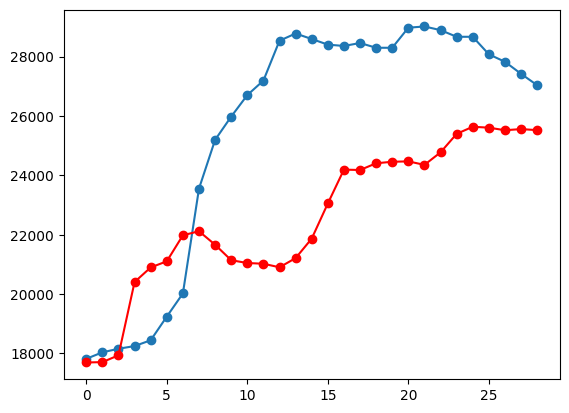

In [12]:
plt.plot(y_test,'o-')
plt.plot(preds,'o-',color='red')

In [13]:
# Para rellenar los NaN que tiene la copia de la tabla original y que el modelo funcione los sustituimos por la media de los datos de la columna
rnd_pred = rnd_pred.fillna(rnd_pred.mean())
rnd_pred

,Agua embalsada
Fecha,
1988-03-01,23337.000000
1988-10-01,23555.000000
1988-01-17,24334.000000
1988-01-24,25230.000000
1988-01-31,27549.000000
...,...
2024-06-30,29954.783315
2024-07-07,29954.783315
2024-07-14,29954.783315


Repetimos el mismo procesado que antes

In [14]:
for i in range(7,0,-1):
    rnd_pred["t-"+str(i)] = rnd_pred["Agua embalsada"].shift(i)

rnd_pred.dropna(inplace=True)
rnd_pred.head(15)

,Agua embalsada,t-7,t-6,t-5,t-4,t-3,t-2,t-1
Fecha,,,,,,,,
1988-02-21,27976.0,23337.0,23555.0,24334.0,25230.0,27549.0,28249.0,28313.0
1988-02-28,27578.0,23555.0,24334.0,25230.0,27549.0,28249.0,28313.0,27976.0
1988-06-03,27205.0,24334.0,25230.0,27549.0,28249.0,28313.0,27976.0,27578.0
1988-03-13,27200.0,25230.0,27549.0,28249.0,28313.0,27976.0,27578.0,27205.0
1988-03-20,27128.0,27549.0,28249.0,28313.0,27976.0,27578.0,27205.0,27200.0
1988-03-27,26945.0,28249.0,28313.0,27976.0,27578.0,27205.0,27200.0,27128.0
1988-03-04,26874.0,28313.0,27976.0,27578.0,27205.0,27200.0,27128.0,26945.0
1988-10-04,27256.0,27976.0,27578.0,27205.0,27200.0,27128.0,26945.0,26874.0
1988-04-17,27825.0,27578.0,27205.0,27200.0,27128.0,26945.0,26874.0,27256.0


In [15]:
X = rnd_pred.iloc[:,1:].values
y = rnd_pred.iloc[:, 0].values

X_train = X[:1810]
X_test = X[1810:]
y_train = y[:1810]
y_test = y[1810:]

print("Shape X_train:", X_train.shape)
print("Shape X_test", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (1810, 7)
Shape X_test (92, 7)
Shape y_train: (1810,)
Shape y_test: (92,)


In [16]:
r1 = prediction(tree, X_test)
r1

[17696.0,
 17708.0,
 17937.0,
 20406.0,
 20897.0,
 21103.0,
 21980.0,
 22116.0,
 21661.0,
 21140.0,
 21046.0,
 21021.0,
 20902.0,
 21211.0,
 21868.0,
 23051.0,
 24191.0,
 24178.0,
 24405.0,
 24456.0,
 24469.0,
 24351.0,
 24773.0,
 25396.0,
 25635.0,
 25604.0,
 25518.0,
 25556.0,
 25521.0,
 25161.0,
 24996.0,
 24921.0,
 24734.0,
 24755.0,
 25802.0,
 26671.0,
 26520.0,
 26183.0,
 25743.0,
 25061.0,
 24427.0,
 23734.0,
 22915.0,
 22251.0,
 21436.0,
 20739.0,
 20100.0,
 19478.0,
 18936.0,
 18398.0,
 17846.0,
 17455.0,
 17291.0,
 17226.0,
 17100.0,
 17294.0,
 17332.0,
 17421.0,
 17958.0,
 18671.0,
 18606.0,
 18459.0,
 18280.0,
 18297.0,
 18212.0,
 18232.0,
 18877.0,
 19381.0,
 19585.0,
 19863.0,
 20390.0,
 20520.0,
 20638.0,
 21764.0,
 22013.0,
 22216.0,
 22530.0,
 22495.0,
 22266.0,
 21991.0,
 21690.0,
 21326.0,
 20965.0,
 20755.0,
 20628.0,
 20467.0,
 20533.0,
 20334.0,
 19958.0,
 19670.0,
 19264.0,
 18829.0]

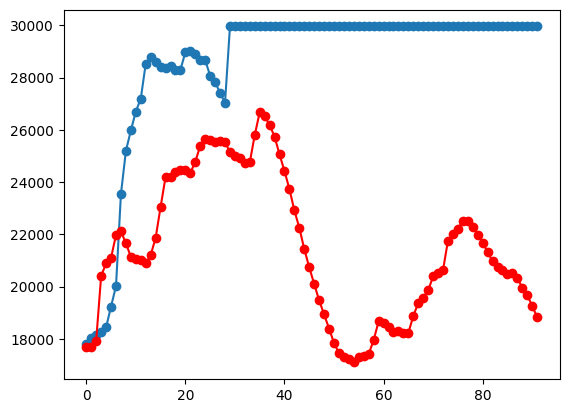

In [17]:
plt.plot(y_test,'o-')
plt.plot(r1,'o-',color='red')

In [18]:
# Salvamos la tabla con los datos procesados
rnd_pred.to_csv("csv/Pred_rnd_reg.csv", sep=",")

Crear una tabla para Full Stack con los datos de la prediccion

In [44]:
#Importar datos
grafica = pd.read_csv("csv/pred_2024.csv",
                        sep=",")

grafica['Fecha'] = pd.to_datetime(grafica['Fecha'], format='%Y/%m/%d')
grafica = grafica.set_index('Fecha')

# Comprobar la ultima fila con dato antes de los NaN
grafica.tail(64)

,Agua embalsada
Fecha,
2023-05-14,27033.0
2023-05-21,NaN
2023-05-28,NaN
2023-06-04,NaN
2023-06-11,NaN
...,...
2024-06-30,NaN
2024-07-07,NaN
2024-07-14,NaN


In [54]:
# Crear una tabla con los datos reales
real = grafica[:-63]
real["Status"] = "Real" # Añadimos columna Status con el valor real para saber que es esos datos no son los de la predicción
real.tail(5)

C:\Users\jorge\AppData\Local\Temp\ipykernel_14160\1081969314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real["Status"] = "Real"


,Agua embalsada,Status
Fecha,,
2023-04-16,28665.0,Real
2023-04-23,28074.0,Real
2023-04-30,27823.0,Real
2023-07-05,27417.0,Real
2023-05-14,27033.0,Real


In [55]:
# Crear una tabla con los NaN
res = grafica[1846:]
res["Status"] = "Pred" # Añadimos una columna Status con el valor Pred para identificar los datos como resultado de la predicción
res.head()

C:\Users\jorge\AppData\Local\Temp\ipykernel_14160\1896039090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Status"] = "Pred"


,Agua embalsada,Status
Fecha,,
2023-05-21,NaN,Pred
2023-05-28,NaN,Pred
2023-06-04,NaN,Pred
2023-06-11,NaN,Pred
2023-06-18,NaN,Pred


In [56]:
# Sustituir los NaN por los datos obtenidos del modelo predictivo
res["Agua embalsada"] = r1[29:]
res.tail()

C:\Users\jorge\AppData\Local\Temp\ipykernel_14160\3314088990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Agua embalsada"] = r1[29:]


,Agua embalsada,Status
Fecha,,
2024-06-30,20334.0,Pred
2024-07-07,19958.0,Pred
2024-07-14,19670.0,Pred
2024-07-21,19264.0,Pred
2024-07-28,18829.0,Pred


In [57]:
# Unir las tablas
df = pd.concat([real, res], sort=True)
df

,Agua embalsada,Status
Fecha,,
1988-03-01,23337.0,Real
1988-10-01,23555.0,Real
1988-01-17,24334.0,Real
1988-01-24,25230.0,Real
1988-01-31,27549.0,Real
...,...,...
2024-06-30,20334.0,Pred
2024-07-07,19958.0,Pred
2024-07-14,19670.0,Pred


<Axes: xlabel='Fecha'>

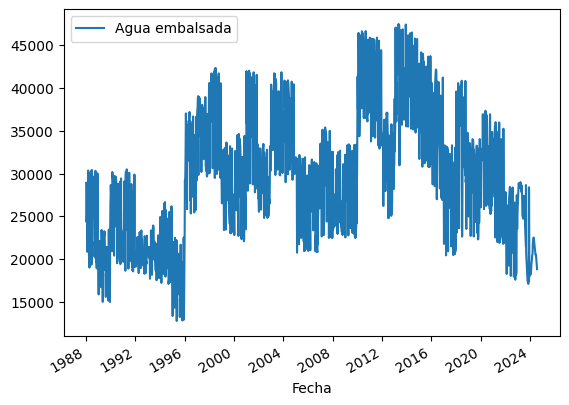

In [58]:
# Pintar gráfica
df.plot()

In [59]:
# Salvar tabla
df.to_csv("csv/tabla_pred_final.csv", sep=",")

In [184]:
# Salvar modelo

import pickle

model_rnd_reg = DecisionTreeRegressor()

with open("model_rnd_reg.pkl", "wb") as model_file:
    pickle.dump(model_rnd_reg, model_file)

OTROS MODELOS QUE NO TIENEN BUEN SCORING Y QUE DESCARTAMOS

RANDOM FOREST

MSE: 68379116.1634888


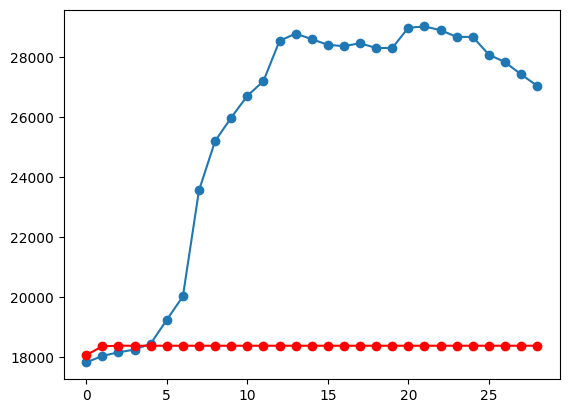

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(n_estimators=200, max_depth=5)
rfr.fit(X_train, y_train)

pred2 = prediction(rfr, X_test) # tengo que predecir uno a uno
print("MSE:", mean_squared_error(pred2, y_test))

plt.plot(y_test, "o-")
plt.plot(pred2, "o-", color="red")

LINEAR REGRESSION

In [164]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)
print("MSE:", mean_squared_error(pred, y_test))

pred2 = prediction(lin_reg, X_test) # predigo uno a uno
print("MSE:", mean_squared_error(pred2, y_test))

MSE: 429972.6565215225
MSE: 19343585.52478172


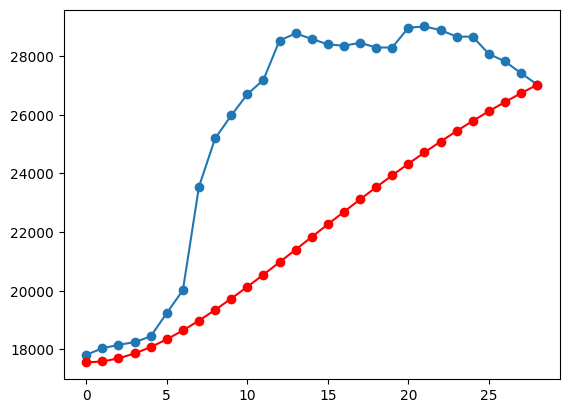

In [165]:
plt.plot(y_test,'o-')
plt.plot(pred2,'o-',color='red')